In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from google.colab import drive

In [2]:
classes = 43  # Total number of traffic sign categories
data = []     # To store image data
labels = []   # To store corresponding labels

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/dataset.zip -d /content/dataset/


Streaming output truncated to the last 5000 lines.
 extracting: /content/dataset/dataset/Train/5/00005_00053_00015.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00016.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00017.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00018.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00019.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00020.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00021.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00022.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00023.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00024.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00025.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00026.png  
 extracting: /content/dataset/dataset/Train/5/00005_00053_00027.png  
 extracting: /content/dataset/dataset/T

In [ ]:
!ls /content/dataset | head -20


dataset


In [4]:
train_path = "/content/dataset/dataset/Train"

In [5]:
!ls /content/dataset/dataset | head -20


Meta
Meta.csv
Test
Test.csv
Train
Train.csv


In [6]:
for i in range(classes):
    path = os.path.join(train_path, str(i))

    if not os.path.exists(path):
        print(f"[WARNING] Path not found: {path}")
        continue

    images = os.listdir(path)

    for a in images:
        try:
            img_path = os.path.join(path, a)
            image = Image.open(img_path)
            image = image.resize((30, 30))
            image = np.array(image)

            data.append(image)
            labels.append(i)

        except Exception as e:
            print(f"[ERROR] Could not load image {a}: {e}")

print(f"✅ Loaded {len(data)} training images across {classes} classes")

✅ Loaded 39209 training images across 43 classes


In [7]:
data = np.array(data)
labels = np.array(labels)

In [8]:
print(f"[INFO] Data shape: {data.shape}")
print(f"[INFO] Labels shape: {labels.shape}")

[INFO] Data shape: (39209, 30, 30, 3)
[INFO] Labels shape: (39209,)


In [9]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# Print the shapes after split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# One-hot encode labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
# Building the CNN model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_test, y_test)
)

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.2154 - loss: 4.8139 - val_accuracy: 0.8993 - val_loss: 0.5045
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7842 - loss: 0.7659 - val_accuracy: 0.9617 - val_loss: 0.1630
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8902 - loss: 0.3910 - val_accuracy: 0.9739 - val_loss: 0.0974
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9166 - loss: 0.3073 - val_accuracy: 0.9827 - val_loss: 0.0719
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9379 - loss: 0.2176 - val_accuracy: 0.9861 - val_loss: 0.0521
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9474 - loss: 0.1915 - val_accuracy: 0.9875 - val_loss: 0.0475
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9510 - loss: 0.1752 - val_accuracy: 0.9851 - val_loss: 0.0575
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9550 - loss: 0.1673 - val_accuracy: 

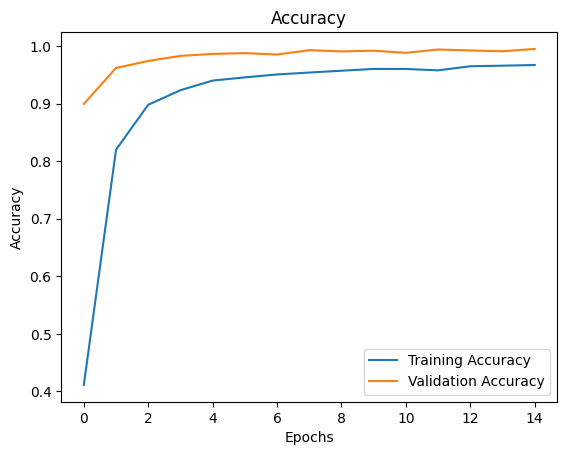

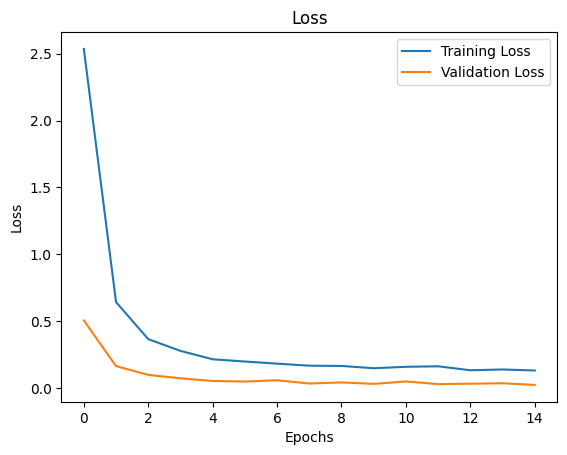

In [12]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [13]:
import os
import numpy as np
from PIL import Image

test_path = "/content/dataset/dataset/Test"

X_test = []

for img_name in os.listdir(test_path):
    try:
        img_path = os.path.join(test_path, img_name)
        image = Image.open(img_path)
        image = image.resize((30, 30))
        image = np.array(image)
        X_test.append(image)
    except Exception as e:
        print(f"[ERROR] Could not load {img_name}: {e}")

X_test = np.array(X_test)

print("✅ Test images loaded:", X_test.shape)

# ---- Run predictions ----
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("First 10 predicted classes:", y_pred_classes[:10])


[ERROR] Could not load GT-final_test.csv: cannot identify image file '/content/dataset/dataset/Test/GT-final_test.csv'
✅ Test images loaded: (12630, 30, 30, 3)
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
First 10 predicted classes: [13 13 11  1 10 18  9  7  2 11]


In [14]:
import os
import numpy as np
from PIL import Image

test_path = "/content/dataset/dataset/Test"

data = []
image_files = [f for f in os.listdir(test_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for img in image_files:
    img_path = os.path.join(test_path, img)
    image = Image.open(img_path)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

print("✅ Test data prepared:", X_test.shape)

# ---- Predictions ----
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

print("✅ Predictions done")
print("First 10 predicted classes:", pred_classes[:10])


✅ Test data prepared: (12630, 30, 30, 3)
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ Predictions done
First 10 predicted classes: [13 13 11  1 10 18  9  7  2 11]


In [ ]:
import pandas as pd

# Correct path
csv_path = "/content/dataset/dataset/Test.csv"

# Try auto-separator detection
test_df = pd.read_csv(csv_path, sep=None, engine="python")

print(test_df.head())
print(test_df.columns)


   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png
Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')


In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.metrics import accuracy_score, classification_report

# CSV with ground truth
csv_path = "/content/dataset/dataset/Test.csv"
test_df = pd.read_csv(csv_path)

# True labels
y_true = test_df["ClassId"].values

# Load test images
data = []
for img in test_df["Path"].values:
    img_path = os.path.join("/content/dataset/dataset", img)  # prepend base folder
    image = Image.open(img_path)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)   # ⚠️ No normalization since training wasn't normalized

# Predict
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

# Accuracy
accuracy = accuracy_score(y_true, pred_classes)
print(f"✅ Test Accuracy: {accuracy:.4f}")

# Detailed report
print(classification_report(y_true, pred_classes))


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ Test Accuracy: 0.9679
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.94      1.00      0.97       720
           2       0.98      0.98      0.98       750
           3       0.97      0.93      0.95       450
           4       1.00      0.98      0.99       660
           5       0.91      0.98      0.95       630
           6       0.89      0.79      0.83       150
           7       0.98      0.99      0.99       450
           8       0.98      0.95      0.97       450
           9       0.98      0.99      0.99       480
          10       0.99      0.99      0.99       660
          11       0.89      0.97      0.93       420
          12       0.99      0.98      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      0.98      0.99       210
          16    

In [16]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_true.shape)
print("Unique train labels:", np.unique(y_train))
print("Unique test labels:", np.unique(y_true))


Train shape: (31367, 30, 30, 3) (31367, 43)
Test shape: (12630, 30, 30, 3) (12630,)
Unique train labels: [0. 1.]
Unique test labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [17]:
from tensorflow.keras.utils import to_categorical

# y_train should be raw class IDs (0–42) BEFORE conversion
print("Raw y_train shape:", y_train.shape)
print("Unique raw y_train:", np.unique(y_train))

# Convert to one-hot only after confirming labels
y_train = to_categorical(y_train, num_classes=43)
y_test_cat = to_categorical(y_true, num_classes=43)  # for validation


Raw y_train shape: (31367, 43)
Unique raw y_train: [0. 1.]


In [18]:
model.save("traffic_sign_model.h5")
print("✅ Model saved as traffic_sign_model.h5")

✅ Model saved as traffic_sign_model.h5
